In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score

In [2]:
train = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

# Data Understanding

In [3]:
train.head()

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
0,52664,a,3942.0,2.0,155623,7855.0,42.0
1,327662,a,26046.0,12.0,21781,55801.0,1175.0
2,468453,c,1358.0,4.0,56177,8067.0,60.0
3,96996,a,264.0,3.0,168793,27064.0,9.0
4,131465,c,4271.0,4.0,112223,13986.0,83.0


In [4]:
test_data.head()

,ID,Tag,Reputation,Answers,Username,Views
0,366953,a,5645.0,3.0,50652,33200.0
1,71864,c,24511.0,6.0,37685,2730.0
2,141692,i,927.0,1.0,135293,21167.0
3,316833,i,21.0,6.0,166998,18528.0
4,440445,i,4475.0,10.0,53504,57240.0


In [5]:
train.shape

(330045, 7)

In [6]:
test_data.shape

(141448, 6)

In [7]:
train.sample(5)

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
294310,175607,p,24275.0,5.0,1373,14999.0,357.0
264588,16933,j,102.0,4.0,10762,1858.0,2.0
126075,173817,c,3629.0,5.0,22990,26024.0,87.0
287968,358965,a,557.0,5.0,150526,28511.0,21.0
127932,166007,i,76.0,1.0,115868,652.0,5.0


In [8]:
train.describe()

,ID,Reputation,Answers,Username,Views,Upvotes
count,330045.000000,3.300450e+05,330045.000000,330045.000000,3.300450e+05,330045.000000
mean,235748.682789,7.773147e+03,3.917672,81442.888803,2.964507e+04,337.505358
std,136039.418471,2.706141e+04,3.579515,49215.100730,8.095646e+04,3592.441135
min,1.000000,0.000000e+00,0.000000,0.000000,9.000000e+00,0.000000
25%,117909.000000,2.820000e+02,2.000000,39808.000000,2.594000e+03,8.000000
50%,235699.000000,1.236000e+03,3.000000,79010.000000,8.954000e+03,28.000000
75%,353620.000000,5.118000e+03,5.000000,122559.000000,2.687000e+04,107.000000
max,471493.000000,1.042428e+06,76.000000,175738.000000,5.231058e+06,615278.000000


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330045 entries, 0 to 330044
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   ID          330045 non-null  int64  
 1   Tag         330045 non-null  object 
 2   Reputation  330045 non-null  float64
 3   Answers     330045 non-null  float64
 4   Username    330045 non-null  int64  
 5   Views       330045 non-null  float64
 6   Upvotes     330045 non-null  float64
dtypes: float64(4), int64(2), object(1)
memory usage: 17.6+ MB


In [10]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141448 entries, 0 to 141447
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   ID          141448 non-null  int64  
 1   Tag         141448 non-null  object 
 2   Reputation  141448 non-null  float64
 3   Answers     141448 non-null  float64
 4   Username    141448 non-null  int64  
 5   Views       141448 non-null  float64
dtypes: float64(3), int64(2), object(1)
memory usage: 6.5+ MB


In [11]:
train.isnull().mean()*100

ID            0.0
Tag           0.0
Reputation    0.0
Answers       0.0
Username      0.0
Views         0.0
Upvotes       0.0
dtype: float64

In [12]:
test_data.isnull().mean()*100

ID            0.0
Tag           0.0
Reputation    0.0
Answers       0.0
Username      0.0
Views         0.0
dtype: float64

In [13]:
train.duplicated().sum()

0

In [14]:
test_data.duplicated().sum()

0

In [15]:
train = train.drop(columns=["ID", "Tag", "Username"])
test = test_data.drop(columns=["ID", "Tag", "Username"])

In [16]:
train.head()

,Reputation,Answers,Views,Upvotes
0,3942.0,2.0,7855.0,42.0
1,26046.0,12.0,55801.0,1175.0
2,1358.0,4.0,8067.0,60.0
3,264.0,3.0,27064.0,9.0
4,4271.0,4.0,13986.0,83.0


In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330045 entries, 0 to 330044
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Reputation  330045 non-null  float64
 1   Answers     330045 non-null  float64
 2   Views       330045 non-null  float64
 3   Upvotes     330045 non-null  float64
dtypes: float64(4)
memory usage: 10.1 MB


# Exploratory Data Analysis

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


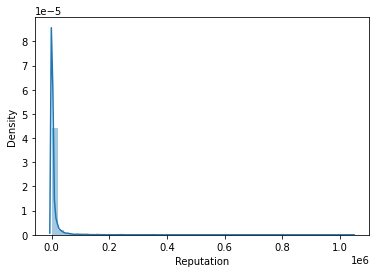

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


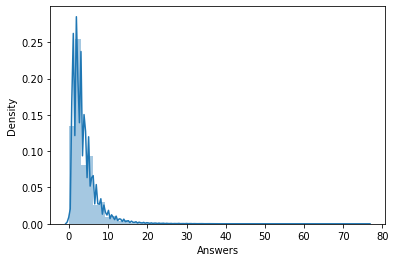

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


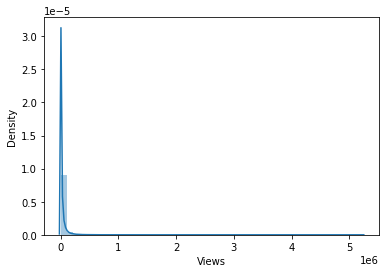

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


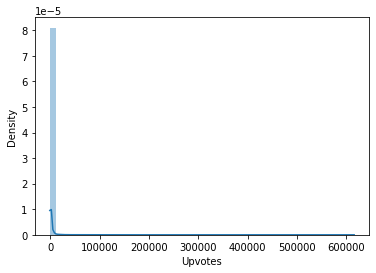

In [18]:
# Distplot
for i in range(len(list(train.columns))):
    if train[train.columns[i]].dtypes == "int64" or train[train.columns[i]].dtypes == "float64":
        sns.distplot(train[train.columns[i]])
        plt.show()
        #plt.xlabel(train.columns[i])

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


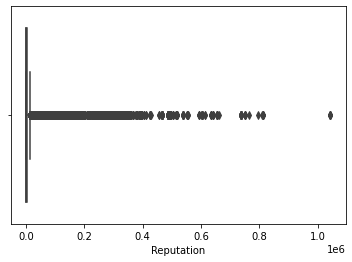

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


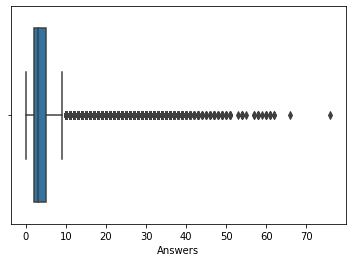

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


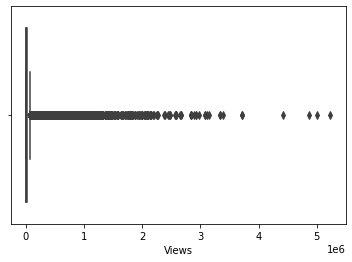

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


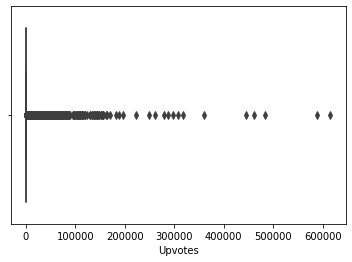

In [19]:
# Boxplot
for i in range(len(list(train.columns))):
    if train[train.columns[i]].dtypes == "int64" or train[train.columns[i]].dtypes == "float64":
        plt.show(sns.boxplot(train[train.columns[i]]))
        #plt.xlabel(train.columns[i])

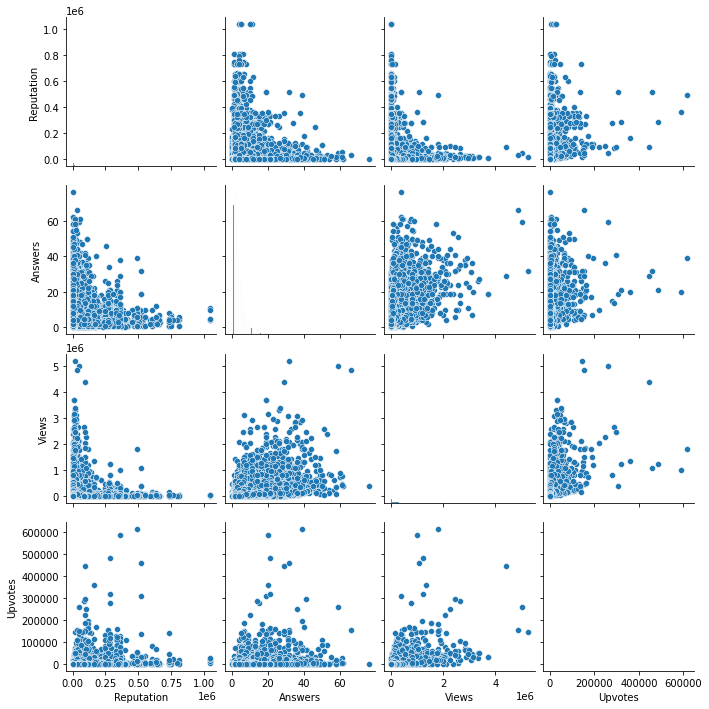

In [20]:
sns.pairplot(train)

# Feature Transformation

Outlier Detection

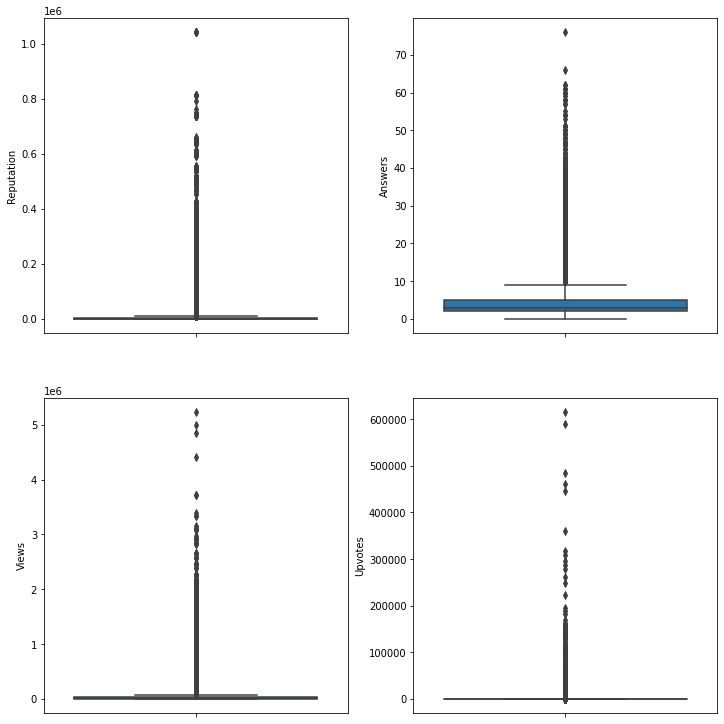

In [21]:
data1 = train#.drop(columns=["Loan_Status","Gender","Married","Education","Self_Employed","Property_Area","Credit_History","Dependents"], axis=1)

fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(10, 10))
index = 0
ax = ax.flatten()

for col in data1.columns:
    sns.boxplot(y=col, data=data1, ax=ax[index])
    index+=1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

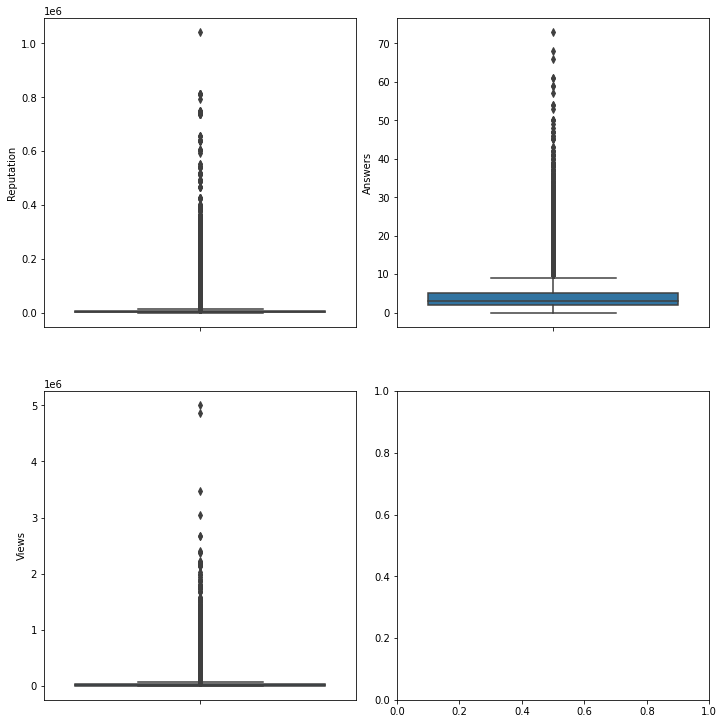

In [22]:
data1 = test#.drop(columns=["Loan_Status","Gender","Married","Education","Self_Employed","Property_Area","Credit_History","Dependents"], axis=1)
#data1.head()

fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(10, 10))
index = 0
ax = ax.flatten()

for col in data1.columns:
    sns.boxplot(y=col, data=data1, ax=ax[index])
    index+=1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


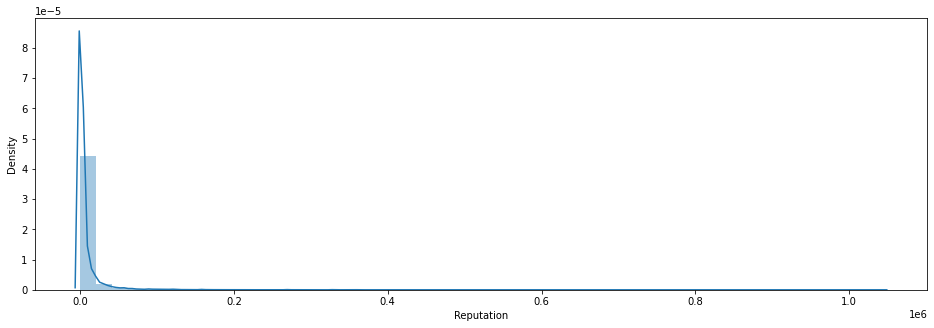

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


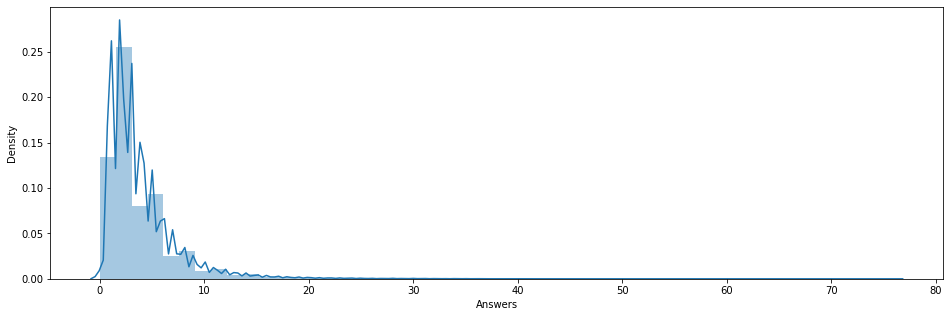

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


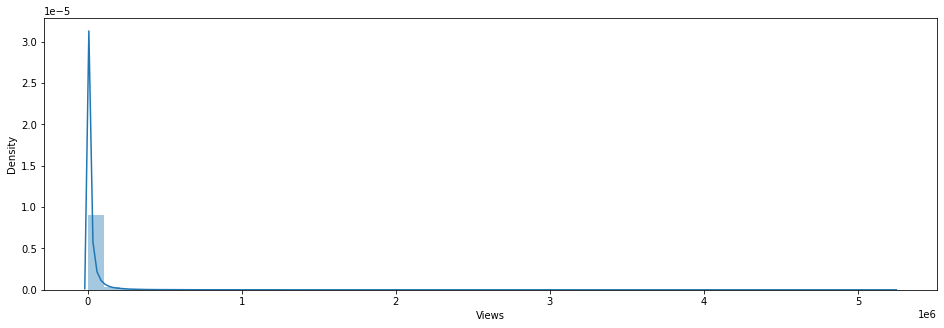

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


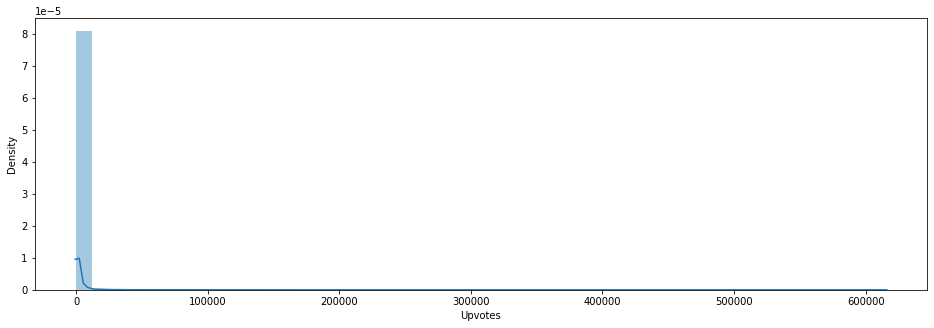

In [23]:
# Distplot
for i in range(len(list(train.columns))):
    if train[train.columns[i]].dtypes == "int64" or train[train.columns[i]].dtypes == "float64":
        plt.figure(figsize=(16,5))
        sns.distplot(train[train.columns[i]])
        plt.show()

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


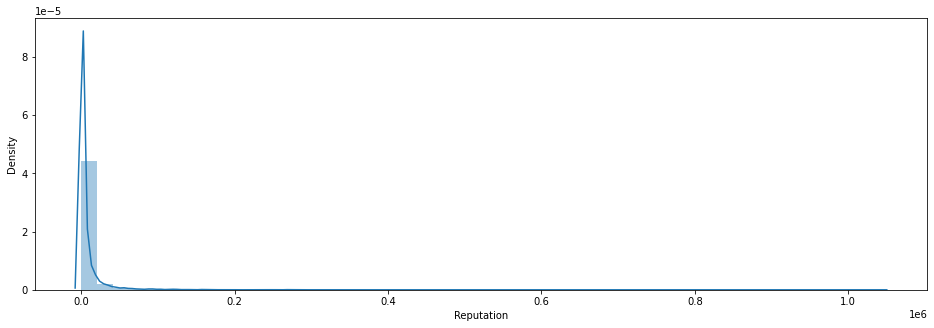

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


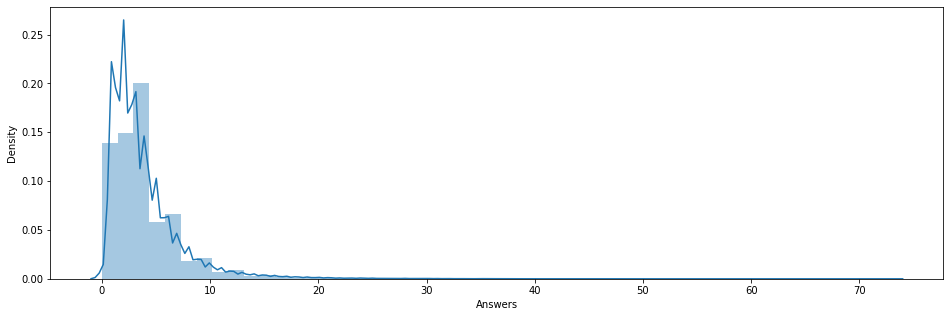

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


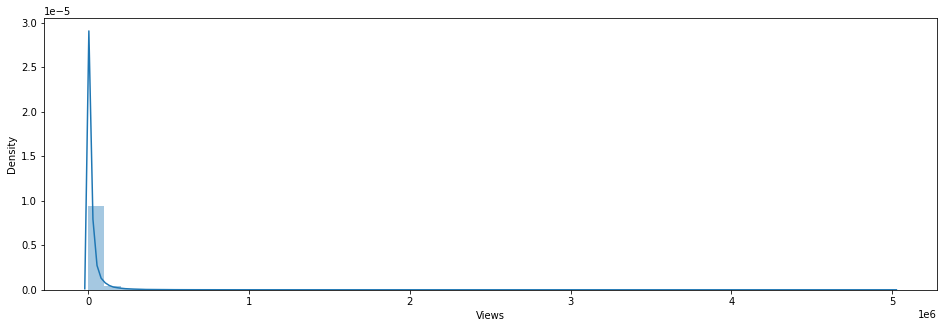

In [24]:
# Distplot
for i in range(len(list(test.columns))):
    if test[test.columns[i]].dtypes == "int64" or test[test.columns[i]].dtypes == "float64":
        plt.figure(figsize=(16,5))
        sns.distplot(test[test.columns[i]])
        plt.show()

In [25]:
for i in range(len(list(train.columns))):
    if train[train.columns[i]].dtypes == "int64" or train[train.columns[i]].dtypes == "float64":
        print(f'{train.columns[i]} : {train[train.columns[i]].skew()}')

Reputation : 11.23002745918498
Answers : 3.380168663661785
Views : 14.37070387509174
Upvotes : 74.24968921492014


In [26]:
for i in range(len(list(test.columns))):
    if test[test.columns[i]].dtypes == "int64" or test[test.columns[i]].dtypes == "float64":
        print(f'{test.columns[i]} : {test[test.columns[i]].skew()}')

Reputation : 11.318535544194582
Answers : 3.3980912343127145
Views : 13.532848265572564


In [27]:
train.shape

(330045, 4)

In [28]:
test.shape

(141448, 3)

In [29]:
# percentile25 = train["colnames"].quantile(0.25)
# percentile75 = train["colnames"].quantile(0.75)
# iqr = percentile75 - percentile25
# upper_limit = percentile75 + 1.5 * iqr
# lower_limit = percentile25 - 1.5 * iqr

upper_limit_rep, lower_limit_rep = train["Reputation"].quantile(0.75) + 1.5 * (train["Reputation"].quantile(0.75) - train["Reputation"].quantile(0.25)), train["Reputation"].quantile(0.75) - 1.5 * (train["Reputation"].quantile(0.75) - train["Reputation"].quantile(0.25))

upper_limit_ans, lower_limit_ans = train["Answers"].quantile(0.75) + 1.5 * (train["Answers"].quantile(0.75) - train["Answers"].quantile(0.25)), train["Answers"].quantile(0.75) - 1.5 * (train["Answers"].quantile(0.75) - train["Answers"].quantile(0.25))

upper_limit_view, lower_limit_view = train["Views"].quantile(0.75) + 1.5 * (train["Views"].quantile(0.75) - train["Views"].quantile(0.25)), train["Views"].quantile(0.75) - 1.5 * (train["Views"].quantile(0.75) - train["Views"].quantile(0.25))

upper_limit_upv, lower_limit_upv = train["Upvotes"].quantile(0.75) + 1.5 * (train["Upvotes"].quantile(0.75) - train["Upvotes"].quantile(0.25)), train["Upvotes"].quantile(0.75) - 1.5 * (train["Upvotes"].quantile(0.75) - train["Upvotes"].quantile(0.25))


In [30]:
# # TRIMING OUTLIERS 

# train = train[train['Reputation'] < upper_limit_rep]
# train = train[train['Answers'] < upper_limit_ans]
# train = train[train['Views'] < upper_limit_view]
# train = train[train['Upvotes'] < upper_limit_upv]

# test = test[train['Reputation'] < upper_limit_rep]
# test = test[train['Answers'] < upper_limit_ans]
# test = test[train['Views'] < upper_limit_view]
# test = test[train['Upvotes'] < upper_limit_upv]

In [31]:
# CAPPING OUTLIERS

train['Reputation'] = np.where(train['Reputation'] > upper_limit_rep,upper_limit_rep,
                                              np.where(train['Reputation'] < lower_limit_rep,lower_limit_rep,
                                              train['Reputation']))

train['Answers'] = np.where(train['Answers'] > upper_limit_ans,upper_limit_ans,
                                              np.where(train['Answers'] < lower_limit_ans,lower_limit_ans,
                                              train['Answers']))

train['Views'] = np.where(train['Views'] > upper_limit_view,upper_limit_view,
                                              np.where(train['Views'] < lower_limit_view,lower_limit_view,
                                              train['Views']))

train['Upvotes'] = np.where(train['Upvotes'] > upper_limit_upv,upper_limit_upv,
                                              np.where(train['Upvotes'] < lower_limit_upv,lower_limit_upv,
                                              train['Upvotes']))


test['Reputation'] = np.where(test['Reputation'] > upper_limit_rep,upper_limit_rep,
                                              np.where(test['Reputation'] < lower_limit_rep,lower_limit_rep,
                                              test['Reputation']))

test['Answers'] = np.where(test['Answers'] > upper_limit_ans,upper_limit_ans,
                                              np.where(test['Answers'] < lower_limit_ans,lower_limit_ans,
                                              test['Answers']))

test['Views'] = np.where(test['Views'] > upper_limit_view,upper_limit_view,
                                              np.where(test['Views'] < lower_limit_view,lower_limit_view,
                                              test['Views']))

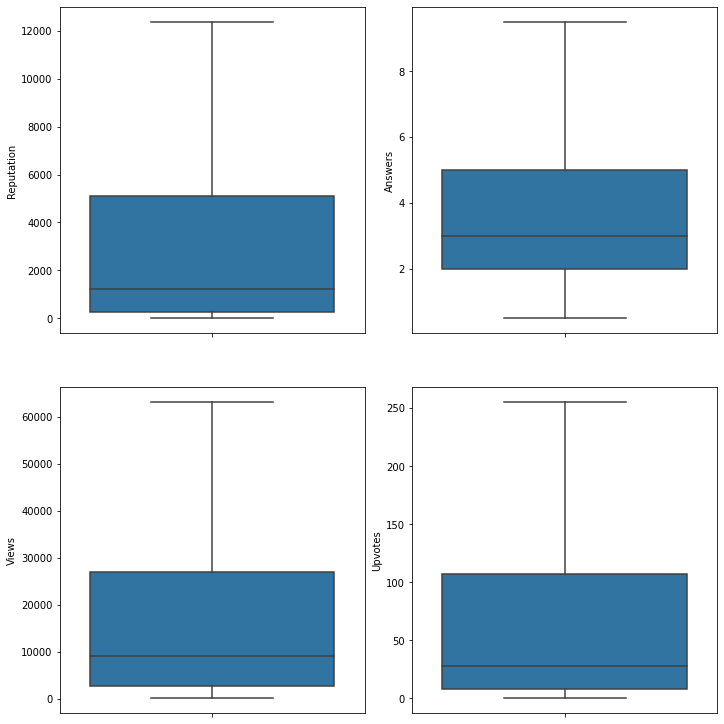

In [32]:
data1 = train#.drop(columns=["Loan_Status","Gender","Married","Education","Self_Employed","Property_Area","Credit_History","Dependents"], axis=1)

fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(10, 10))
index = 0
ax = ax.flatten()

for col in data1.columns:
    sns.boxplot(y=col, data=data1, ax=ax[index])
    index+=1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

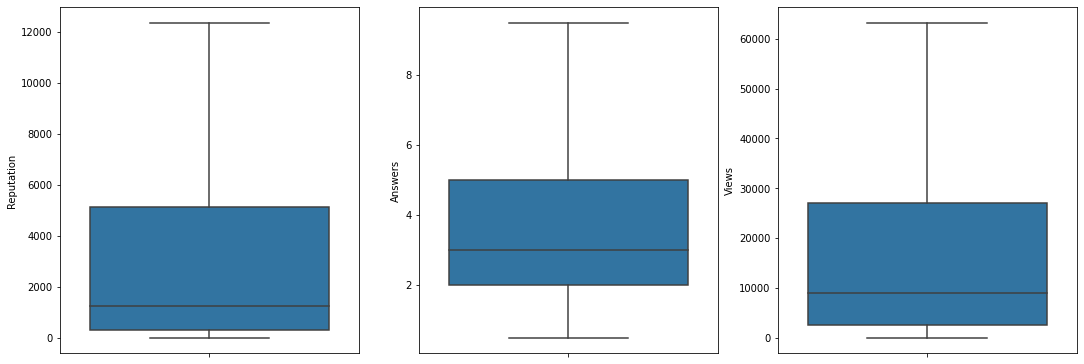

In [33]:
data1 = test#.drop(columns=["Loan_Status","Gender","Married","Education","Self_Employed","Property_Area","Credit_History","Dependents"], axis=1)
#data1.head()

fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(15, 5))
index = 0
ax = ax.flatten()

for col in data1.columns:
    sns.boxplot(y=col, data=data1, ax=ax[index])
    index+=1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


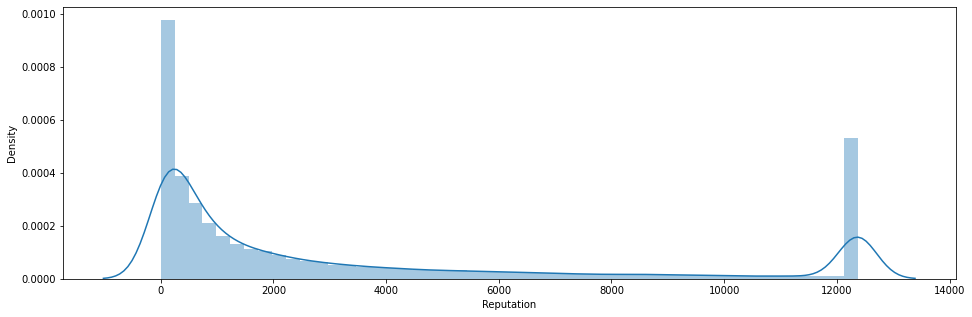

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


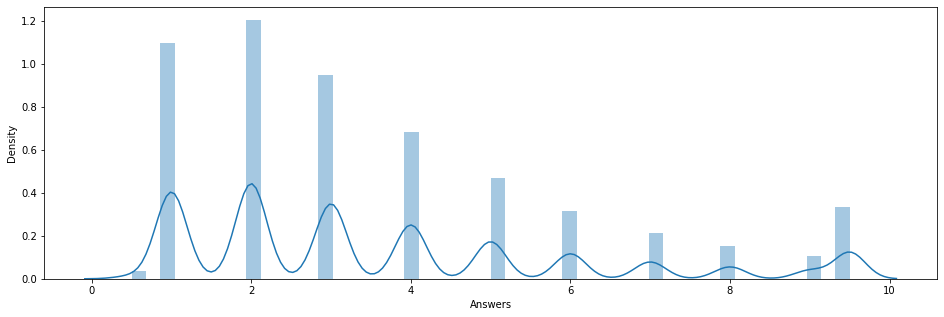

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


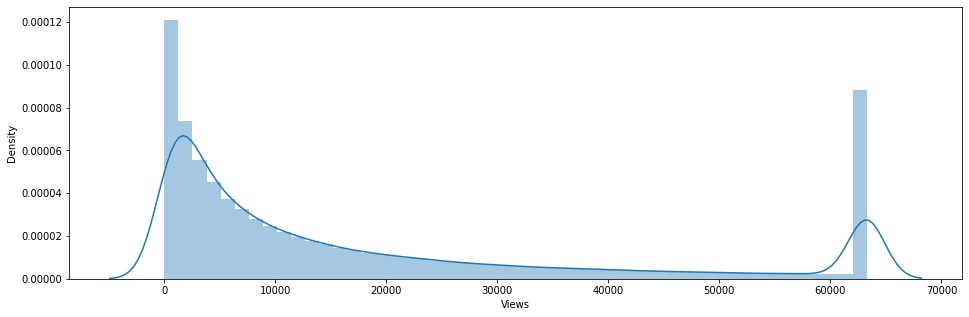

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


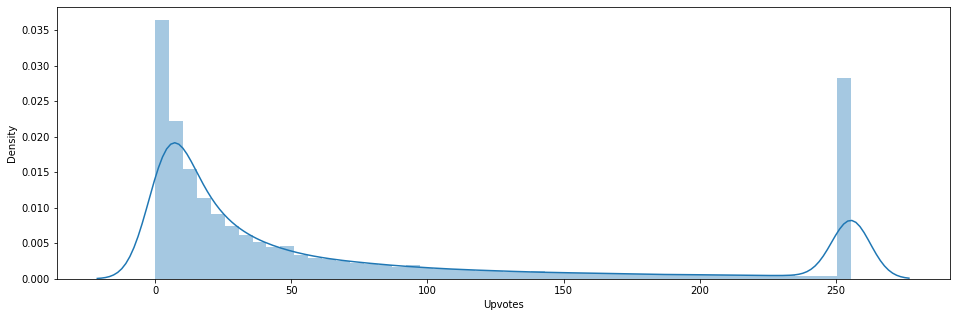

In [34]:
# Distplot
for i in range(len(list(train.columns))):
    if train[train.columns[i]].dtypes == "int64" or train[train.columns[i]].dtypes == "float64":
        plt.figure(figsize=(16,5))
        sns.distplot(train[train.columns[i]])
        plt.show()

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


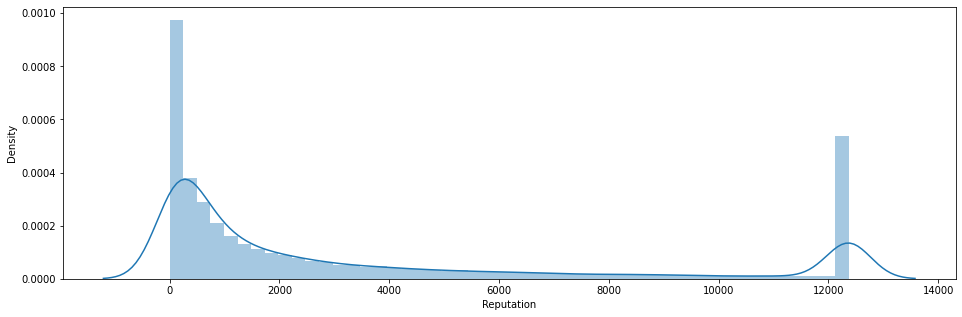

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


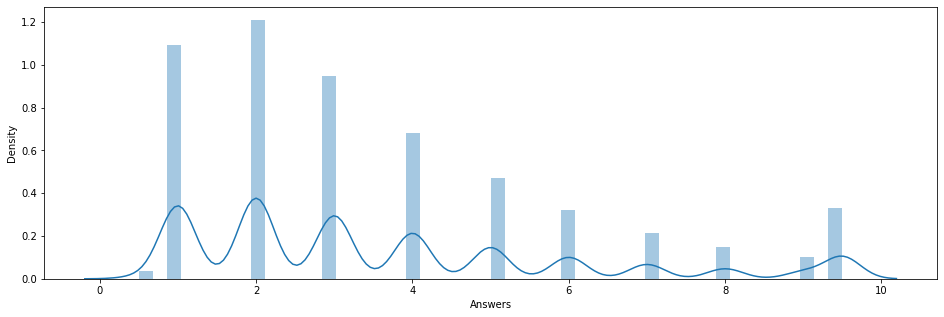

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


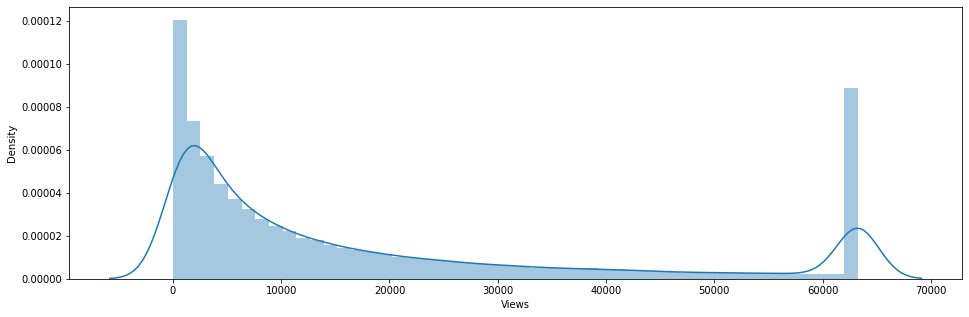

In [35]:
# Distplot
for i in range(len(list(test.columns))):
    if test[test.columns[i]].dtypes == "int64" or test[test.columns[i]].dtypes == "float64":
        plt.figure(figsize=(16,5))
        sns.distplot(test[test.columns[i]])
        plt.show()

In [36]:
train.shape

(330045, 4)

In [37]:
test.shape

(141448, 3)

In [38]:
train.head()

,Reputation,Answers,Views,Upvotes
0,3942.0,2.0,7855.0,42.0
1,12372.0,9.5,55801.0,255.5
2,1358.0,4.0,8067.0,60.0
3,264.0,3.0,27064.0,9.0
4,4271.0,4.0,13986.0,83.0


In [39]:
x = train.iloc[:,:-1]
y = train.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [40]:
x_train.head()

,Reputation,Answers,Views
4627,12087.0,6.0,25968.0
71538,9501.0,1.0,231.0
305492,192.0,9.5,63284.0
168979,475.0,1.0,6141.0
143705,391.0,1.0,3836.0


In [41]:
y_train.head()

4627      192.0
71538       4.0
305492     86.0
168979      6.0
143705     10.0
Name: Upvotes, dtype: float64

# Model Building

**Linear Regression**

In [42]:
prepro = PolynomialFeatures(degree=2, include_bias=True)
x_train_tr = prepro.fit_transform(x_train)
x_test_tr = prepro.transform(x_test)

In [43]:
lr = LinearRegression()
model = lr.fit(x_train_tr,y_train)
pred = model.predict(x_test_tr)
print(r2_score(y_test, pred)*100)
print(mean_absolute_error(y_test, pred))

72.16312267380682
33.701574774956335


In [44]:
score = []
for i in range(1000):
    x = train.iloc[:,:-1]
    y = train.iloc[:,-1]

    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.1, random_state=i)
    
    prepro = PolynomialFeatures(degree=2, include_bias=True)
    x_train_tr = prepro.fit_transform(x_train)
    x_test_tr = prepro.transform(x_test)
    
    lr = LinearRegression()
    lr.fit(x_train_tr,y_train)
    pred = lr.predict(x_test_tr)
    score.append(r2_score(y_test,pred)*100)
print("i= ",np.argmax(score))
print(score[np.argmax(score)])

i=  530
73.06034890124475


In [45]:
lr = LinearRegression()

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.1, random_state=np.argmax(score))

prepro = PolynomialFeatures(degree=2, include_bias=True)
x_train_tr = prepro.fit_transform(x_train)
x_test_tr = prepro.transform(x_test)

model1 = lr.fit(x_train_tr,y_train)
pred = model1.predict(x_test_tr)
r2_score(y_test, pred)*100

73.06034890124475

In [46]:
# Training Data Accuracy

pred = model1.predict(x_train_tr)
r2_score(y_train, pred)*100      #Generalized

72.20315561837691

In [47]:
#CROSS VALIDATION TO CHECK WHETHER THE MODEL IS GENERALIZED OR NOT

mod1 = cross_val_score(LinearRegression(), x_train_tr, y_train, cv=10)
print(mod1)
print(np.round(np.mean(mod1),2)*100)

[0.72598344 0.72307151 0.72369977 0.71917213 0.72402437 0.71918628
 0.71755341 0.72143857 0.71851128 0.72709111]
72.0


**Decision Tree Regressor**

In [48]:
dtr = DecisionTreeRegressor(random_state=3)
model = dtr.fit(x_train,y_train)
pred = model.predict(x_test)
print(r2_score(y_test, pred)*100)
print(mean_absolute_error(y_test, pred))

70.99529950682123
26.338732434970105


In [49]:
for imp, name in sorted(zip(model.feature_importances_, x_train.columns), reverse=True):
    print(name, imp)

Reputation 0.5047257746725924
Views 0.47323667964948984
Answers 0.022037545677917846


In [50]:
score = []
for i in range(500):
    x = train.iloc[:,:-1]
    y = train.iloc[:,-1]

    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.1, random_state=i)
    
    dtr = DecisionTreeRegressor(random_state=3)
    dtr.fit(x_train,y_train)
    pred = dtr.predict(x_test)
    score.append(r2_score(y_test,pred)*100)
print("i= ",np.argmax(score))
print(score[np.argmax(score)])

i=  485
71.87227236172716


In [51]:
dtr = DecisionTreeRegressor(random_state=3)

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.1, random_state=np.argmax(score))

model2 = dtr.fit(x_train,y_train)
pred = model2.predict(x_test)
r2_score(y_test, pred)*100

71.87227236172716

In [52]:
# Training Data Accuracy

pred = model2.predict(x_train)
r2_score(y_train, pred)*100     #Overfitting

97.8417147424859

In [53]:
#CROSS VALIDATION TO CHECK WHETHER THE MODEL IS GENERALIZED OR NOT

mod2 = cross_val_score(DecisionTreeRegressor(random_state=3), x_train, y_train, cv=10)
print(mod2)
print(np.round(np.mean(mod2),2)*100)

[0.69591636 0.70098433 0.70187243 0.70265624 0.69405751 0.69244751
 0.69413596 0.70502087 0.70021288 0.70074145]
70.0


**Random Forest Regressor**

In [59]:
rfr = RandomForestRegressor(random_state=4)

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.1, random_state=4)

model3 = rfr.fit(x_train,y_train)
pred = model3.predict(x_test)
r2_score(y_test, pred)*100

81.36856556267178

In [60]:
# Training Data Accuracy
pred = model3.predict(x_train)
r2_score(y_train, pred)*100     

95.88305613160666

In [62]:
#CROSS VALIDATION TO CHECK WHETHER THE MODEL IS GENERALIZED OR NOT

mod3 = cross_val_score(RandomForestRegressor(random_state=4), x_train, y_train, cv=3)
print(mod3)
print(np.round(np.mean(mod3),2)*100)

[0.81235114 0.81307667 0.80984744]
81.0


In [72]:
test_pred = model3.predict(test)
test_pred

array([212.07583333, 185.87166667,  36.9       , ...,  55.78      ,
         6.63      ,  16.59      ])

In [73]:
submission = pd.DataFrame({"ID": test_data["ID"], "Upvotes": test_pred})

In [74]:
submission.head()

,ID,Upvotes
0,366953,212.075833
1,71864,185.871667
2,141692,36.900000
3,316833,8.515000
4,440445,247.543333


In [75]:
submission.to_csv('Upvotes_Prediction_submission.csv', index=False)